In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns


In [2]:
features = pd.read_csv('data/features.csv')
stores = pd.read_csv('data/stores.csv')
sales = pd.read_csv('data/sales.csv')
# I renamed the csv files to make them easier to work with

In [29]:
def quickDescribe(df): # I made this function to quickly describe the data since we are working with 3 data sets
    print('\n', '##Example##\n' , df.sample(n=5))
    print('\n', '##Shape', df.shape )
    print('\n', '##stats##\n', df.describe())
    print('\n', '##datatypes##\n', df.info()) # for some reason the ##datatype## is below the the df.info output?
    print('\n', '##nulls##\n' , df.isnull().sum())
quickDescribe(features)


 ##Example##
       Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
568       4 2010-07-09        80.35       2.637        NaN        NaN   
7709     43 2011-05-06        66.77       3.906        NaN        NaN   
6681     37 2012-07-27        84.00       3.407      22.21        NaN   
2885     16 2013-01-25        21.62       2.872    5069.98     207.53   
7019     39 2012-01-27        60.65       3.290    1119.34    2578.64   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
568         NaN        NaN        NaN  126.151800         7.372      False  
7709        NaN        NaN        NaN  207.571493        10.581      False  
6681       0.93        NaN     705.33  220.623405         6.623      False  
2885       0.10     551.55    1490.43  200.815099         5.415      False  
7019      82.50       4.00    1647.30  218.768720         7.244      False  

 ##Shape (8190, 12)

 ##stats##
              Store  Temperature   Fuel_Price      

In [4]:
## Cleaning the features data set
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True) # Confirmed that the dates are in the correct format
features['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8190 entries, 0 to 8189
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8190 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 64.1 KB


In [5]:
missing_CPI_Dates = features['Date'].loc[features['CPI'].isnull()]
missing_CPI_Dates.groupby(missing_CPI_Dates.dt.year).count() # I grouped the missing CPI dates by year to see if there was a pattern

Date
2013    585
Name: Date, dtype: int64

In [6]:
features.loc[features['Date'] == 2013].value_counts()  

Series([], dtype: int64)

In [8]:
# Seeing as the miscosg values are all from 2013, I will fill them with the mean of the column
# features['CPI'] = features['CPI'].fillna(features['CPI'].mean())
# # I will do the same for the unemployment column
# features['Unemployment'] = features['Unemployment'].fillna(features['Unemployment'].mean())
# Since they are both from 2013, we may end up dropping the whole year from the data set
# features = features.dropna() # I decided to drop the whole year since it is only 3 rows of data]
# sales = sales.dropna() # I decided to drop the whole year since it is only 3 rows of data



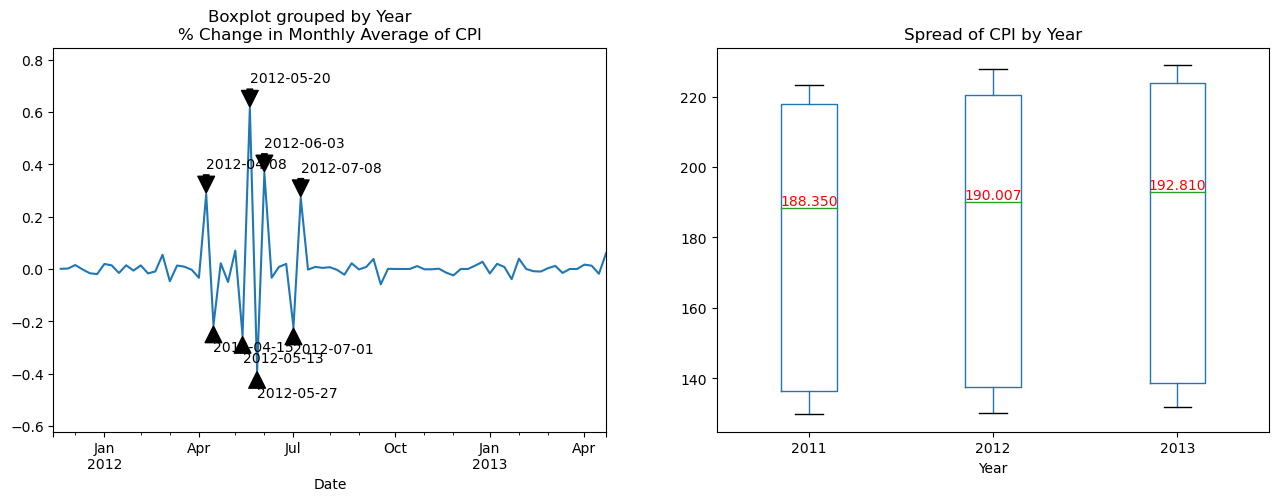

In [31]:
fig, axs = plt.subplots(1,2)

droppedFeatures = features.dropna()
cpi = droppedFeatures['CPI']
cpi_dates = droppedFeatures['Date']

graphDF = pd.DataFrame({'CPI': cpi, 'Date': cpi_dates})
graphDF = graphDF.set_index('Date')

groupedChange = graphDF.groupby(pd.Grouper(freq="W")).mean().pct_change()
groupedChange

grouped_data = graphDF.groupby(graphDF.index.year)



fig1 = groupedChange.plot(kind='line',
                           ylim=(groupedChange['CPI'].min() - groupedChange['CPI'].std()*2, groupedChange['CPI'].max() + groupedChange['CPI'].std()*2),
                             ax=axs[0], title='% Change in Monthly Average of CPI', legend=False)

#set an annotation of the date if the change is greater than 0.1
for i in range(len(groupedChange)):
    if groupedChange.iloc[i]['CPI'] > 0.1:
        fig1.annotate(groupedChange.index[i].strftime('%Y-%m-%d'), xy=(groupedChange.index[i], groupedChange.iloc[i]['CPI']), xytext=(groupedChange.index[i], groupedChange.iloc[i]['CPI'] + 0.1),
                     arrowprops=dict(facecolor='black', shrink=0.05),)
    if groupedChange.iloc[i]['CPI'] < -0.1:
        fig1.annotate(groupedChange.index[i].strftime('%Y-%m-%d'), xy=(groupedChange.index[i], groupedChange.iloc[i]['CPI']), xytext=(groupedChange.index[i], groupedChange.iloc[i]['CPI'] - 0.1),
                     arrowprops=dict(facecolor='black', shrink=0.05),)
        
    

df = pd.DataFrame({'CPI': cpi, 'Date': cpi_dates})
df['Date'] = pd.to_datetime(df['Date']).dt.year
df.rename(columns={'Date': 'Year'}, inplace=True)
fig2 = df.boxplot(by='Year', column='CPI', figsize=(12,8), ax=axs[1], grid=False)
fig2.set_title('Spread of CPI by Year')

## setting label
i = 0
for year in df['Year'].unique():
  median_value = df['CPI'].loc[df['Year'] == year].median()
  text_x = fig2.get_xticks()[i]
  text_y = median_value
  i += 1
  axs[1].text(text_x, text_y, f'{median_value:.3f}', color='r', ha='center', va='bottom')

plt.subplots_adjust(bottom=0.1, right=2,)
plt.show()

# Thanks to:
# https://stackoverflow.com/a/16393023 
# https://stackoverflow.com/a/45229527

In [179]:
sales.sample(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
210955,22,29,2010-11-26,10096.00,True
272699,28,44,2010-08-06,4567.42,False
49139,6,3,2011-04-29,10592.79,False
323697,34,24,2011-12-23,7661.74,False
180994,19,29,2012-03-09,5463.92,False


In [180]:
sales_with_stores = pd.merge(stores, sales, on='Store', how='outer')
quickDescribe(sales_with_stores)


 ##Example##
         Store Type    Size  Dept       Date  Weekly_Sales  IsHoliday
151144     16    B   57197    24 2010-07-16       1754.20      False
238908     25    B  128107    13 2011-12-02      28411.89      False
122681     13    A  219622    37 2011-12-09       2890.08      False
106391     11    A  207499    85 2012-03-23       1649.16      False
90361      10    B  126512    22 2010-05-21      21618.52      False

 ##Shape (421570, 7)

 ##stats##
                Store           Size           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000  421570.000000
mean       22.200546  136727.915739      44.260317   15981.258123
std        12.785297   60980.583328      30.492054   22711.183519
min         1.000000   34875.000000       1.000000   -4988.940000
25%        11.000000   93638.000000      18.000000    2079.650000
50%        22.000000  140167.000000      37.000000    7612.030000
75%        33.000000  202505.000000      74.000000   20205.852500
max     

In [181]:
sales_with_stores = pd.merge(stores, sales, on='Store', how='outer')
sales_with_stores['year'] = sales['Date'].apply(lambda x: x.year)
sales_with_stores.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,year
0,1,A,151315,1,2010-02-05,24924.50,False,2010
1,1,A,151315,1,2010-02-12,46039.49,True,2010
2,1,A,151315,1,2010-02-19,41595.55,False,2010
3,1,A,151315,1,2010-02-26,19403.54,False,2010
4,1,A,151315,1,2010-03-05,21827.90,False,2010


In [250]:
stores_by_year = sales_with_stores.groupby(['year', 'Store'])['Weekly_Sales'].sum().reset_index()

stores_by_year['pct_change'] = stores_by_year.groupby('Store')['Weekly_Sales'].pct_change().fillna(0)

stores_by_year.tail(10)


,year,Store,Weekly_Sales,pct_change
125,2012,36,13286470.53,-0.299703
126,2012,37,22612774.69,-0.165010
127,2012,38,18631073.45,-0.065679
128,2012,39,65885662.85,-0.130539
129,2012,40,41172407.34,-0.182122
130,2012,41,56887839.93,-0.147312
131,2012,42,24950359.85,-0.143109
132,2012,43,26975233.97,-0.158423
133,2012,44,14187373.72,-0.084579
134,2012,45,32723630.17,-0.204489


In [262]:
stores_by_year = sales_with_stores.groupby(['year', 'Store'])['Weekly_Sales'].sum().reset_index()
stores_by_year = stores_by_year.merge(stores[["Store", 'Type']], how='left', on='Store')

stores_by_year['pct_change'] = stores_by_year.groupby('Store')['Weekly_Sales'].pct_change().fillna(0)
stores_by_year.merge(stores[["Store" ,'Type']], how='left', on='Store')

stores_by_year.tail(10)
stores_by_year.loc[stores_by_year['pct_change']  > 0, 'graph_color'] = "green"
stores_by_year.loc[stores_by_year['pct_change']  == 0, 'graph_color'] = "blue"
stores_by_year.loc[stores_by_year['pct_change']  < 0, 'graph_color'] = "red"
quickDescribe(stores_by_year)


 ##Example##
      year  Store  Weekly_Sales Type  pct_change graph_color
73   2011     29   27950345.20    B    0.037241       green
126  2012     37   22612774.69    C   -0.165010         red
52   2011      8   47512786.16    A    0.099719       green
111  2012     22   42655656.23    B   -0.203513         red
130  2012     41   56887839.93    A   -0.147312         red

 ##Shape (135, 6)

 ##stats##
               year       Store  Weekly_Sales  pct_change
count   135.000000  135.000000  1.350000e+02  135.000000
mean   2011.000000   23.000000  4.990533e+07   -0.034659
std       0.819538   13.035543  2.636476e+07    0.115167
min    2010.000000    1.000000  1.143555e+07   -0.299703
25%    2010.000000   12.000000  2.696103e+07   -0.157805
50%    2011.000000   23.000000  4.635736e+07    0.000000
75%    2012.000000   34.000000  6.795558e+07    0.035948
max    2012.000000   45.000000  1.110923e+08    0.202134
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data col

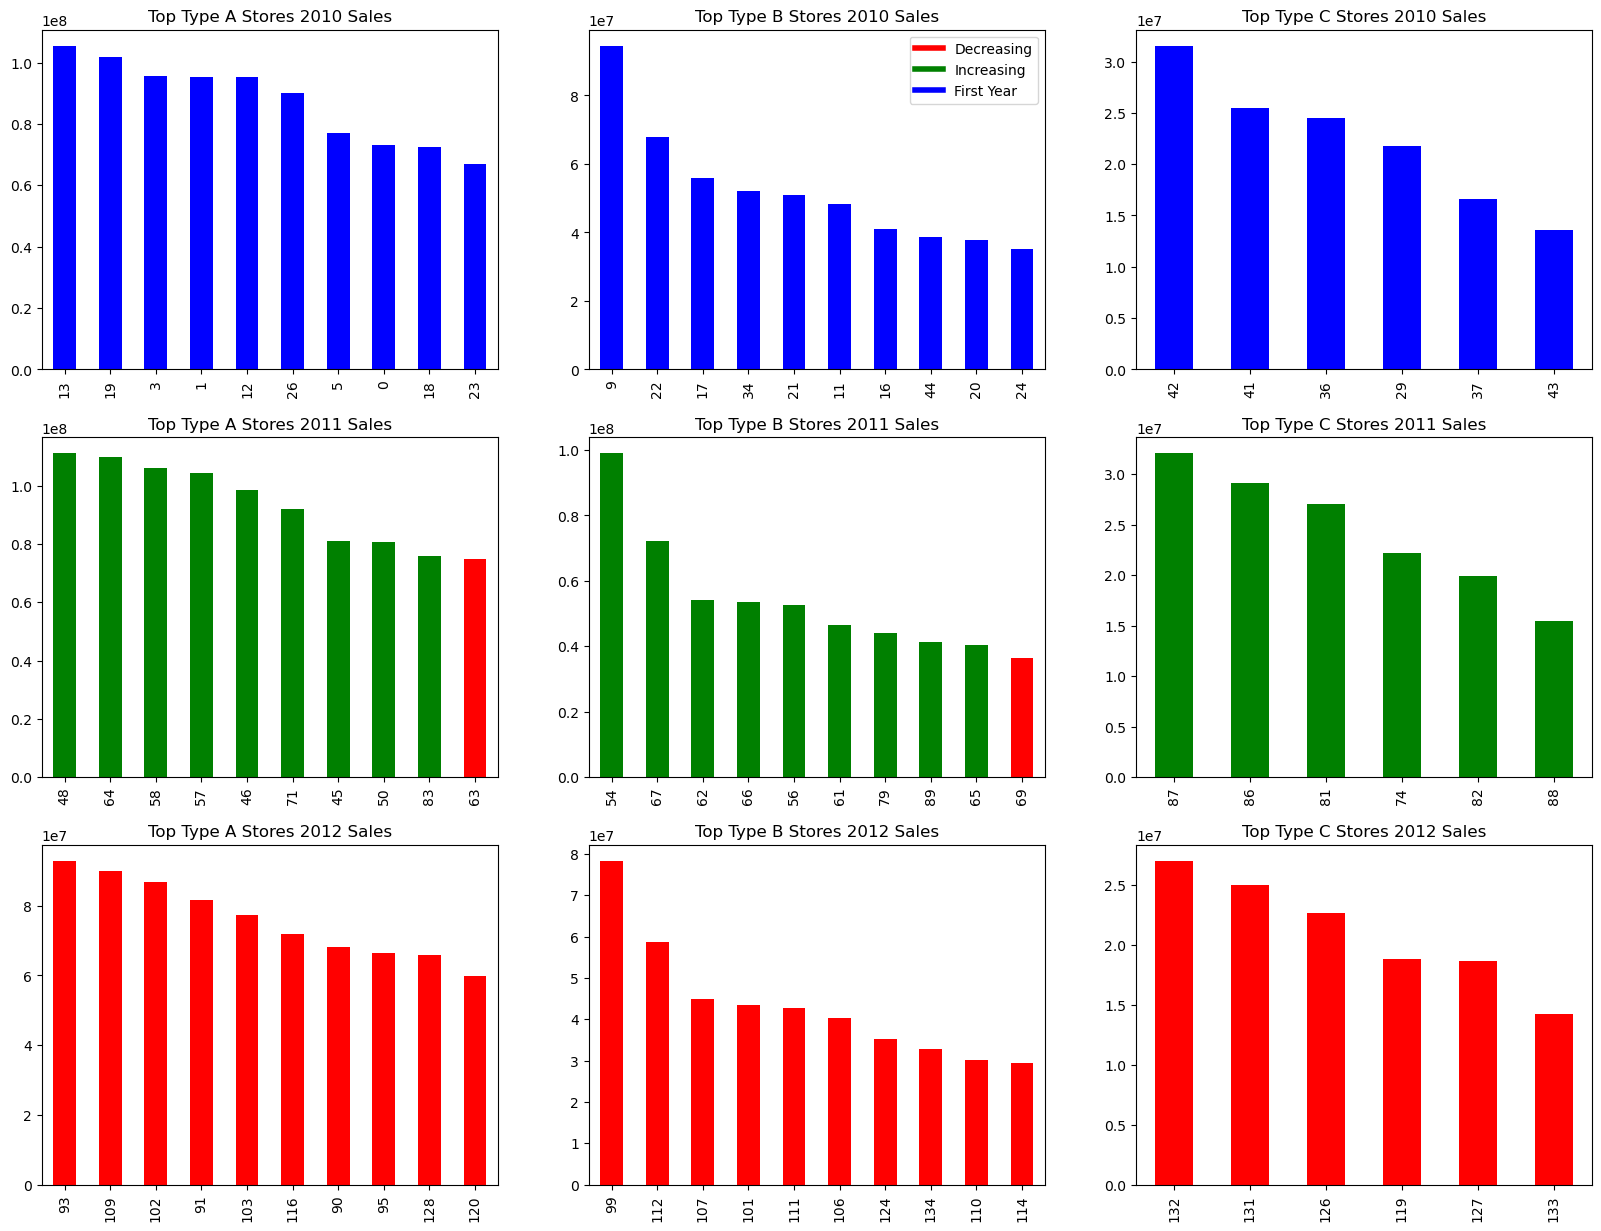

In [277]:
fig, axs = plt.subplots(3,3)
fig.set_size_inches(20, 15)
i=2
for i, year in enumerate(stores_by_year['year'].unique()):
    # print(i, year)
    fig1 = stores_by_year.loc[(stores_by_year['Type'] == 'A') & (stores_by_year['year'] == year) ].sort_values(by='Weekly_Sales', ascending=False).head(10).plot(
        kind = 'bar', y='Weekly_Sales', ax=axs[i,0], color=stores_by_year.loc[(stores_by_year['Type'] == 'B') & (stores_by_year['year'] == year)]['graph_color'],
          title=f"Top Type A Stores {year} Sales", legend=None)
    fig2 = stores_by_year.loc[(stores_by_year['Type'] == 'B') & (stores_by_year['year'] == year)].sort_values(by='Weekly_Sales', ascending=False).head(10).plot(
        kind = 'bar', y='Weekly_Sales', ax=axs[i,1], color=stores_by_year.loc[(stores_by_year['Type'] == 'B') & (stores_by_year['year'] == year)]['graph_color'],
          title=f"Top Type B Stores {year} Sales", legend=None)
    fig3 = stores_by_year.loc[(stores_by_year['Type'] == 'C') & (stores_by_year['year'] == year) ].sort_values(by='Weekly_Sales', ascending=False).head(10).plot(
        kind = 'bar', y='Weekly_Sales', ax=axs[i,2], color=stores_by_year.loc[(stores_by_year['Type'] == 'B') & (stores_by_year['year'] == year)]['graph_color'],
          title=f"Top Type C Stores {year} Sales", legend=False)
    from matplotlib.lines import Line2D
    legend_elements = [

    Line2D([0], [0], color='red', lw=4, label='Decreasing'),
    Line2D([0], [0], color='green', lw=4, label='Increasing'),
    Line2D([0], [0], color='Blue', lw=4, label='First Year')
    ]
    axs[0,1].legend(handles=legend_elements, loc='best')


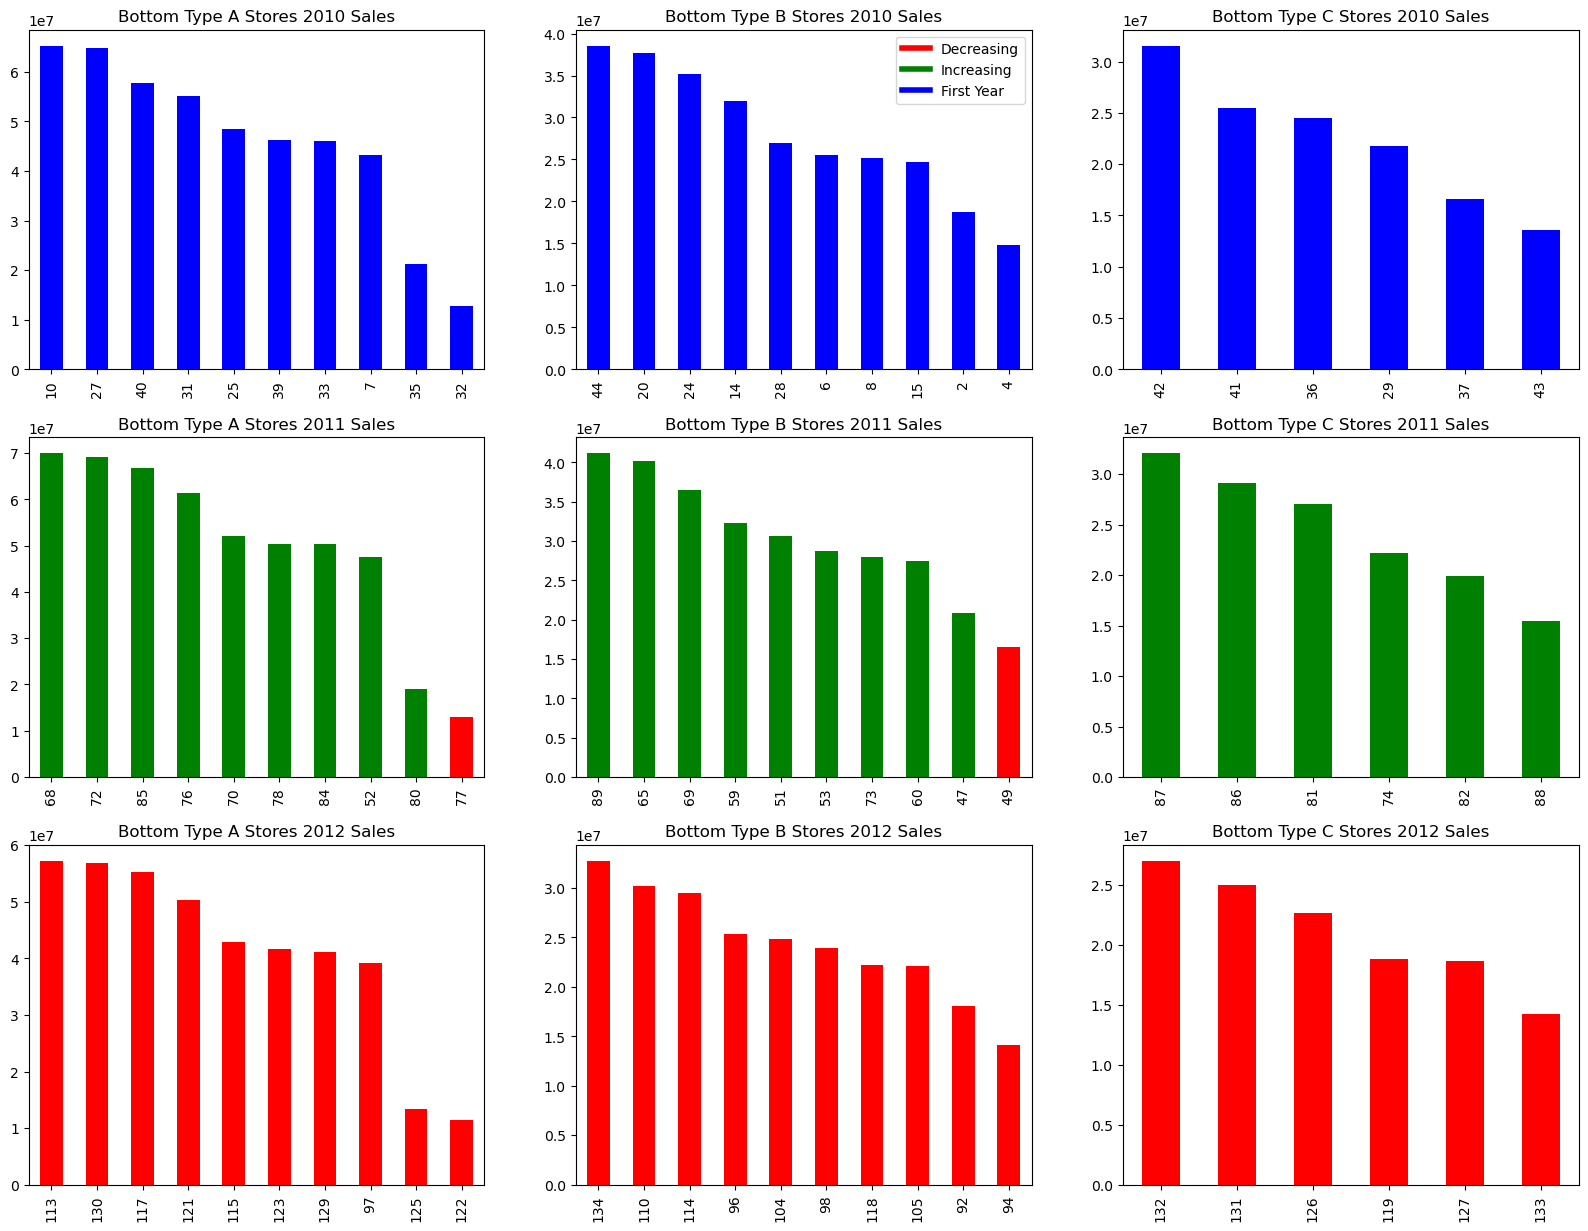

In [276]:
fig, axs = plt.subplots(3,3)
fig.set_size_inches(20, 15)
i=2
for i, year in enumerate(stores_by_year['year'].unique()):
    # print(i, year)
    fig1 = stores_by_year.loc[(stores_by_year['Type'] == 'A') & (stores_by_year['year'] == year) ].sort_values(by='Weekly_Sales', ascending=False).tail(10).plot(
        kind = 'bar', y='Weekly_Sales', ax=axs[i,0], color=stores_by_year.loc[(stores_by_year['Type'] == 'B') & (stores_by_year['year'] == year)]['graph_color'],
          title=f"Bottom Type A Stores {year} Sales", legend=None)
    fig2 = stores_by_year.loc[(stores_by_year['Type'] == 'B') & (stores_by_year['year'] == year)].sort_values(by='Weekly_Sales', ascending=False).tail(10).plot(
        kind = 'bar', y='Weekly_Sales', ax=axs[i,1], color=stores_by_year.loc[(stores_by_year['Type'] == 'B') & (stores_by_year['year'] == year)]['graph_color'],
          title=f"Bottom Type B Stores {year} Sales", legend=None)
    fig3 = stores_by_year.loc[(stores_by_year['Type'] == 'C') & (stores_by_year['year'] == year) ].sort_values(by='Weekly_Sales', ascending=False).tail(10).plot(
        kind = 'bar', y='Weekly_Sales', ax=axs[i,2], color=stores_by_year.loc[(stores_by_year['Type'] == 'B') & (stores_by_year['year'] == year)]['graph_color'],
          title=f"Bottom Type C Stores {year} Sales", legend=False)
    from matplotlib.lines import Line2D
    legend_elements = [

    Line2D([0], [0], color='red', lw=4, label='Decreasing'),
    Line2D([0], [0], color='green', lw=4, label='Increasing'),
    Line2D([0], [0], color='Blue', lw=4, label='First Year')
    ]
    axs[0,1].legend(handles=legend_elements, loc='best')


In [11]:
from datetime import datetime
sales['Date'] = [datetime.strptime(date, '%d/%m/%Y') for date in sales['Date']] # I converted the date column to datetime format
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [113]:
may2012 = sales.loc[sales['Date'].dt.year == 2012].loc[sales['Date'].dt.month == 5]
june2012 = sales.loc[sales['Date'].dt.year == 2012].loc[sales['Date'].dt.month == 6]
potential_outliers = pd.concat([may2012, june2012])


In [115]:
# quickDescribe(potential_outliers)


 ##Example##
         Store  Dept       Date  Weekly_Sales  IsHoliday  pre_holiday  \
65779       7    59 2012-05-25          3.00      False        False   
139382     15     9 2012-05-11      17332.18      False        False   
103320     11    41 2012-06-29        434.23      False        False   
230548     24    27 2012-05-25       1644.87      False        False   
13909       2    27 2012-05-25       1096.82      False        False   

       Holiday_Status  
65779     Non-Holiday  
139382    Non-Holiday  
103320    Non-Holiday  
230548    Non-Holiday  
13909     Non-Holiday  

 ##Shape (26575, 7)

 ##stats##
               Store          Dept   Weekly_Sales
count  26575.000000  26575.000000   26575.000000
mean      22.268109     44.522220   16157.170602
std       12.790266     30.634542   22154.073639
min        1.000000      1.000000    -548.000000
25%       11.000000     18.000000    2097.275000
50%       22.000000     38.000000    7622.190000
75%       33.000000     74.0000

In [81]:
salesViZ = sales
salesViZ['Date'] = pd.to_datetime(salesViZ['Date'])


In [82]:
def is_pre_holiday(date):
    for key, value in timeDict.items():
        # Check if the date falls within the same week as the holiday
        if date > value and date < key:
            return True
    return False


In [83]:
holidays = salesViZ[salesViZ['IsHoliday'] == True]
holiday_dates = holidays['Date'].unique()
high_priority_dates = []
for date in holiday_dates:
    four_weeks_before_holiday = date - pd.DateOffset(weeks=4)
    high_priority_dates.append(np.datetime64(four_weeks_before_holiday))
    
zipped = zip(holiday_dates, high_priority_dates)
timeDict = dict(zipped)

salesViZ['pre_holiday'] = salesViZ['Date'].apply(is_pre_holiday)
salesViZ.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,pre_holiday
0,1,1,2010-02-05,24924.50,False,True
1,1,1,2010-02-12,46039.49,True,False
2,1,1,2010-02-19,41595.55,False,False
3,1,1,2010-02-26,19403.54,False,False
4,1,1,2010-03-05,21827.90,False,False


In [84]:
salesViZ['Holiday_Status'] = ''

# Set the holiday status based on the encoded values
salesViZ.loc[(salesViZ['IsHoliday'] == True) & (salesViZ['pre_holiday'] == True), 'Holiday_Status'] = 'Holiday'
salesViZ.loc[(salesViZ['IsHoliday'] == True) & (salesViZ['pre_holiday'] == False), 'Holiday_Status'] = 'Holiday'
salesViZ.loc[(salesViZ['IsHoliday'] == False) & (salesViZ['pre_holiday'] == True), 'Holiday_Status'] = 'Pre-Holiday'
salesViZ.loc[(salesViZ['IsHoliday'] == False) & (salesViZ['pre_holiday'] == False), 'Holiday_Status'] = 'Non-Holiday'

# salesViZ.drop('pre_holiday', axis=1, inplace=True)
# salesViZ.drop('IsHoliday', axis=1, inplace=True)
salesViZ.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,pre_holiday,Holiday_Status
0,1,1,2010-02-05,24924.50,False,True,Pre-Holiday
1,1,1,2010-02-12,46039.49,True,False,Holiday
2,1,1,2010-02-19,41595.55,False,False,Non-Holiday
3,1,1,2010-02-26,19403.54,False,False,Non-Holiday
4,1,1,2010-03-05,21827.90,False,False,Non-Holiday


In [85]:
weeklysales = salesViZ.groupby(['Date', 'Holiday_Status']).sum()['Weekly_Sales'].reset_index()
weeklysales.head()

,Date,Holiday_Status,Weekly_Sales
0,2010-02-05,Pre-Holiday,49750740.50
1,2010-02-12,Holiday,48336677.63
2,2010-02-19,Non-Holiday,48276993.78
3,2010-02-26,Non-Holiday,43968571.13
4,2010-03-05,Non-Holiday,46871470.30


In [86]:
weeklysales.head()
pivotsales = weeklysales.pivot(index='Date', columns='Holiday_Status', values='Weekly_Sales')
pivotsales.head()

Holiday_Status,Holiday,Non-Holiday,Pre-Holiday
Date,,,
2010-02-05,NaN,NaN,49750740.5
2010-02-12,48336677.63,NaN,NaN
2010-02-19,NaN,48276993.78,NaN
2010-02-26,NaN,43968571.13,NaN
2010-03-05,NaN,46871470.30,NaN


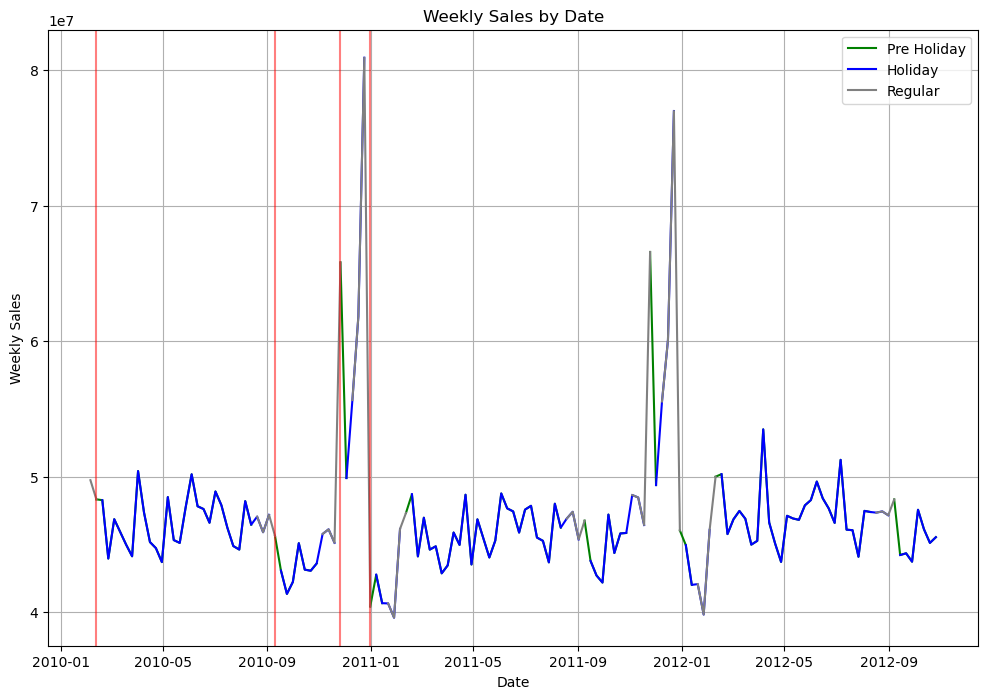

In [87]:
fig, ax = plt.subplots(figsize=(12, 8))
oneYear = weeklysales
# oneYear = weeklysales.loc[weeklysales['Date'].dt.year == 2010]

pholiday = np.ma.masked_where(oneYear['Holiday_Status'] == 'Pre-Holiday', oneYear['Weekly_Sales'])
holiday = np.ma.masked_where(oneYear['Holiday_Status'] == 'Holiday', oneYear['Weekly_Sales'])
regular = np.ma.masked_where(oneYear['Holiday_Status'] == 'Non-Holiday', oneYear['Weekly_Sales'])

ax.plot(oneYear['Date'], pholiday, color='Green', label='Pre Holiday')
ax.plot(oneYear['Date'], holiday, color='blue', label='Holiday')
ax.plot(oneYear['Date'], regular, color='grey', label='Regular')

ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
ax.set_title('Weekly Sales by Date')
ax.grid(True)
# annotation with holiday dates
for date in holiday_dates:
    if pd.to_datetime([date]).year == 2010:
        ax.axvline(date, color='red', alpha=0.5)
ax.legend()


plt.show()


In [88]:
def holiday_status_line()

SyntaxError: expected ':' (3414205294.py, line 1)

In [ ]:
oneYear = weeklysales['Date'].dt.year == 2010
quickDescribe(oneYear)


 ##Example##
 134    False
96     False
102    False
89     False
41      True
Name: Date, dtype: bool

 ##Shape (143,)

 ##stats##
 count       143
unique        2
top       False
freq         95
Name: Date, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 143 entries, 0 to 142
Series name: Date
Non-Null Count  Dtype
--------------  -----
143 non-null    bool 
dtypes: bool(1)
memory usage: 275.0 bytes

 ##datatypes##
 None

 ##nulls##
 0


In [ ]:
potential_outliers['IsHoliday'].value_counts() # I checked to see if there were any holidays during this time


False    26575
Name: IsHoliday, dtype: int64

In [ ]:
sales_cleaned = sales.loc[sales['Date'].dt.year != 2012].loc[sales['Date'].dt.month != 5].loc[sales['Date'].dt.month != 6]  # TODO replace with mean of the same week in the previous year
features_cleaned = features.loc[features['Date'].dt.year != 2012].loc[features['Date'].dt.month != 5].loc[features['Date'].dt.month != 6] # TODO replace  with mean of the same week in the previous year
features_cleaned['CPI'].fillna(features_cleaned['CPI'].mean(), inplace=True) # I filled the missing values with the mean

In [ ]:
# lets join the features and sales data sets on the store and date columns
sales_features = pandas.merge(sales_cleaned, features_cleaned, on=['Store', 'Date'], how='inner')
sales_features.info() # I checked to see if the merge was successful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247256 entries, 0 to 247255
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           247256 non-null  int64         
 1   Dept            247256 non-null  int64         
 2   Date            247256 non-null  datetime64[ns]
 3   Weekly_Sales    247256 non-null  float64       
 4   IsHoliday_x     247256 non-null  bool          
 5   pre_holiday     247256 non-null  bool          
 6   Holiday_Status  247256 non-null  object        
 7   Temperature     247256 non-null  float64       
 8   Fuel_Price      247256 non-null  float64       
 9   MarkDown1       23700 non-null   float64       
 10  MarkDown2       20154 non-null   float64       
 11  MarkDown3       23116 non-null   float64       
 12  MarkDown4       21042 non-null   float64       
 13  MarkDown5       23994 non-null   float64       
 14  CPI             247256 non-null  flo

In [ ]:
sales_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,pre_holiday,Holiday_Status,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,True,Pre-Holiday,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,True,Pre-Holiday,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,True,Pre-Holiday,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,True,Pre-Holiday,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,True,Pre-Holiday,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [ ]:
#cosce we are going to do some predictions on the sales data, we need to encode the categorical data
sales_features['IsHoliday_x'] = sales_features['IsHoliday_x'].astype(int) # I converted the IsHoliday column to int
sales_features.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True) # I renamed the IsHoliday_x column to IsHoliday
sales_features.drop(columns=['IsHoliday_y'], inplace=True) # I dropped the IsHoliday_y column
sales_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,pre_holiday,Holiday_Status,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,True,Pre-Holiday,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,True,Pre-Holiday,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,True,Pre-Holiday,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,True,Pre-Holiday,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,True,Pre-Holiday,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [ ]:
#markdown NaN can be replaced with 0 since markdown is a discount and 0 is no discount
sales_features['MarkDown1'].fillna(0, inplace=True)
for i in range(1,6):
    sales_features['MarkDown'+ str(i)].fillna(0, inplace=True)

sales_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,pre_holiday,Holiday_Status,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,True,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,True,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,True,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,True,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,True,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


In [ ]:
# adding the tag "is_pre_holiday"  if the date is 4 weeks before a holiday


In [ ]:
holidays = sales_features[sales_features['IsHoliday'] == True]

In [ ]:
holiday_dates = holidays['Date'].unique()
holiday_dates

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
high_priority_dates = []
for date in holiday_dates:
    four_weeks_before_holiday = date - pandas.DateOffset(weeks=4)
    high_priority_dates.append(np.datetime64(four_weeks_before_holiday))
print(high_priority_dates)
zipped = zip(holiday_dates, high_priority_dates)
timeDict = dict(zipped)


[numpy.datetime64('2010-01-15T00:00:00.000000'), numpy.datetime64('2010-08-13T00:00:00.000000'), numpy.datetime64('2010-10-29T00:00:00.000000'), numpy.datetime64('2010-12-03T00:00:00.000000'), numpy.datetime64('2011-01-14T00:00:00.000000'), numpy.datetime64('2011-08-12T00:00:00.000000'), numpy.datetime64('2011-10-28T00:00:00.000000'), numpy.datetime64('2011-12-02T00:00:00.000000')]


In [ ]:
def is_pre_holiday(date):
    for key, value in timeDict.items():
        if date >= value and date <= key:
            return 1
    return 0


In [ ]:
sales_features['pre_holiday'] = sales_features['Date'].apply(is_pre_holiday)
sales_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,pre_holiday,Holiday_Status,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,2010-02-05,50605.27,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,2010-02-05,13740.12,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,2010-02-05,39954.04,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,2010-02-05,32229.38,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


In [ ]:
#splitting the date into year, month, and day columns
sales_features['Year'] = sales_features['Date'].dt.year
sales_features['Month'] = sales_features['Date'].dt.month
sales_features['Day'] = sales_features['Date'].dt.day
sales_features.drop(columns=['Date'], inplace=True)
sales_features.head()


,Store,Dept,Weekly_Sales,IsHoliday,pre_holiday,Holiday_Status,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day
0,1,1,24924.50,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
1,1,2,50605.27,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
2,1,3,13740.12,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
3,1,4,39954.04,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
4,1,5,32229.38,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5


In [ ]:
# encoding the year into 1, 2, 3, 4
sales_features['Year'] = sales_features['Year'].map({2010: 1, 2011: 2, 2012: 3, 2013: 4})
sales_features.head()

,Store,Dept,Weekly_Sales,IsHoliday,pre_holiday,Holiday_Status,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day
0,1,1,24924.50,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,2,5
1,1,2,50605.27,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,2,5
2,1,3,13740.12,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,2,5
3,1,4,39954.04,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,2,5
4,1,5,32229.38,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,2,5


In [ ]:
sales_features['Month'].dtypes()

NameError: name 'sales_features' is not defined

In [ ]:
# Encoding the month and days cyclically thanks to http://blog.davidkaleko.com/feature-engineering-cyclical-features.html
# Basicly, we are ploting the month and day onto a "clock" and then using the angle of the clock hand to encode the month and day between -1 and 1 
sales_features['mnth_sin'] = np.sin((sales_features.Month-1)*(2.*np.pi/12))
sales_features['mnth_cos'] = np.cos((sales_features.Month-1)*(2.*np.pi/12))

In [ ]:
def day_sin(row):
    if row['Month'] == 1:
        return np.sin((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 2:
        return np.sin((row['Day']-1)*(2.*np.pi/28))
    elif row['Month'] == 3:
        return np.sin((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 4:
        return np.sin((row['Day']-1)*(2.*np.pi/30))
    elif row['Month'] == 5:
        return np.sin((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 6:
        return np.sin((row['Day']-1)*(2.*np.pi/30))
    elif row['Month'] == 7:
        return np.sin((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 8:
        return np.sin((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 9:
        return np.sin((row['Day']-1)*(2.*np.pi/30))
    elif row['Month'] == 10:
        return np.sin((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 11:
        return np.sin((row['Day']-1)*(2.*np.pi/30))
    elif row['Month'] == 12:
        return np.sin((row['Day']-1)*(2.*np.pi/31))
    else:
        return np.nan

In [ ]:
def day_cos(row):   
    if row['Month'] == 1:
        return np.cos((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 2:
        return np.cos((row['Day']-1)*(2.*np.pi/28)) 
    elif row['Month'] == 3:
        return np.cos((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 4:
        return np.cos((row['Day']-1)*(2.*np.pi/30))
    elif row['Month'] == 5:
        return np.cos((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 6:
        return np.cos((row['Day']-1)*(2.*np.pi/30))
    elif row['Month'] == 7:
        return np.cos((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 8:
        return np.cos((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 9:
        return np.cos((row['Day']-1)*(2.*np.pi/30))
    elif row['Month'] == 10:
        return np.cos((row['Day']-1)*(2.*np.pi/31))
    elif row['Month'] == 11:
        return np.cos((row['Day']-1)*(2.*np.pi/30))
    elif row['Month'] == 12:
        return np.cos((row['Day']-1)*(2.*np.pi/31))
    else:
        return np.nan

In [ ]:
sales_features['day_sin'] = sales_features.apply(day_sin, axis=1)
sales_features['day_cos'] = sales_features.apply(day_cos, axis=1) 

In [ ]:
sales_features.drop(columns=['Month', 'Day'], inplace=True)
sales_features.head()

,Store,Dept,Weekly_Sales,IsHoliday,pre_holiday,Holiday_Status,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,mnth_sin,mnth_cos,day_sin,day_cos
0,1,1,24924.50,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0.5,0.866025,0.781831,0.62349
1,1,2,50605.27,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0.5,0.866025,0.781831,0.62349
2,1,3,13740.12,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0.5,0.866025,0.781831,0.62349
3,1,4,39954.04,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0.5,0.866025,0.781831,0.62349
4,1,5,32229.38,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,0.5,0.866025,0.781831,0.62349


In [ ]:
#dropping our holiday_status column since that was for human readability
sales_features.drop(columns=['Holiday_Status'], inplace=True)

In [ ]:
#one hot encoding the store, department numbers
sales_features = pandas.get_dummies(sales_features, columns=['Store', 'Dept'])
sales_features.head()

,Weekly_Sales,IsHoliday,pre_holiday,Holiday_Status,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,24924.50,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,50605.27,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,13740.12,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,39954.04,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,32229.38,0,1,Pre-Holiday,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#printing off the columns to make sure everything is good
for col in sales_features.columns:
    print(col)

Weekly_Sales
IsHoliday
pre_holiday
Holiday_Status
Temperature
Fuel_Price
MarkDown1
MarkDown2
MarkDown3
MarkDown4
MarkDown5
CPI
Unemployment
Year
mnth_sin
mnth_cos
day_sin
day_cos
Store_1
Store_2
Store_3
Store_4
Store_5
Store_6
Store_7
Store_8
Store_9
Store_10
Store_11
Store_12
Store_13
Store_14
Store_15
Store_16
Store_17
Store_18
Store_19
Store_20
Store_21
Store_22
Store_23
Store_24
Store_25
Store_26
Store_27
Store_28
Store_29
Store_30
Store_31
Store_32
Store_33
Store_34
Store_35
Store_36
Store_37
Store_38
Store_39
Store_40
Store_41
Store_42
Store_43
Store_44
Store_45
Dept_1
Dept_2
Dept_3
Dept_4
Dept_5
Dept_6
Dept_7
Dept_8
Dept_9
Dept_10
Dept_11
Dept_12
Dept_13
Dept_14
Dept_16
Dept_17
Dept_18
Dept_19
Dept_20
Dept_21
Dept_22
Dept_23
Dept_24
Dept_25
Dept_26
Dept_27
Dept_28
Dept_29
Dept_30
Dept_31
Dept_32
Dept_33
Dept_34
Dept_35
Dept_36
Dept_37
Dept_38
Dept_39
Dept_40
Dept_41
Dept_42
Dept_43
Dept_44
Dept_45
Dept_46
Dept_47
Dept_48
Dept_49
Dept_50
Dept_51
Dept_52
Dept_54
Dept_55
Dept_56
De

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
y = sales_features['Weekly_Sales']
X = sales_features.drop(columns=['Weekly_Sales'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the prediction using R-squared score
accuracy = r2_score(y_test, y_pred)
print("R-squared score:", accuracy)

R-squared score: 0.642356180099321


In [ ]:
# Create a dataframe of the model coefficients
coef = pandas.DataFrame(list(zip(X.columns, model.coef_)), columns=['Features', 'Coefficients'])
coef

,Features,Coefficients
0,IsHoliday,-1.202660e+02
1,pre_holiday,6.446652e+02
2,Temperature,-2.371264e+02
3,Fuel_Price,6.596051e+02
4,MarkDown1,1.968378e+01
...,...,...
137,Dept_95,1.130661e+15
138,Dept_96,9.709343e+14
139,Dept_97,1.116431e+15
140,Dept_98,1.074871e+15


In [ ]:
#create a dataframe of the model feature importances
importances = pandas.DataFrame(list(zip(X.columns, np.transpose(model.coef_))), columns=['Features', 'Importance'])
importances.sort_values(by=['Importance'], ascending=False, inplace=True)
importances.head(10)

,Features,Importance
134,Dept_92,1.130661e+15
137,Dept_95,1.130661e+15
97,Dept_38,1.130661e+15
132,Dept_90,1.130661e+15
99,Dept_40,1.130661e+15
62,Dept_2,1.130661e+15
133,Dept_91,1.130661e+15
73,Dept_13,1.130661e+15
68,Dept_8,1.130661e+15
67,Dept_7,1.130661e+15


In [ ]:
#dig into the mnth_sin feature, can we determine what month is the best for sales?



-5.000000e-01    29802
 1.000000e+00    29443
 1.224647e-16    29182
-1.000000e+00    26487
-8.660254e-01    26485
-8.660254e-01    23613
 8.660254e-01    23601
 5.000000e-01    23580
-5.000000e-01    23368
 0.000000e+00    11695
Name: mnth_sin, dtype: int64

Low R-Squared Score, we are looking for at least a .7, more like .9 so lets try other stuff

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import threading
import time

# Define a function for model training with a timeout
def train_model_with_timeout(pipeline, X, y, max_training_time):
    def train_model():
        pipeline.fit(X, y)

    thread = threading.Thread(target=train_model)
    thread.daemon = True
    thread.start()
    thread.join(max_training_time)

    if thread.is_alive():
        # If the training is still running, stop the pipeline and raise a TimeoutError
        pipeline.named_steps['regressor'].n_jobs = 1  # Set n_jobs to 1 for thread safety
        pipeline.named_steps['regressor'].n_estimators = 0  # Stop training by setting n_estimators to 0
        thread.join()
        raise TimeoutError("Training time exceeded the threshold.")

# Create a pipeline with scaling and Random Forest Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, n_jobs=-1))  # Adjust n_estimators and n_jobs as needed
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the maximum training time threshold (in seconds)
max_training_time = 5  # 5 minutes

# Start the timer
start_time = time.time()

try:
    # Train the model with timeout
    train_model_with_timeout(pipeline, X_train, y_train, max_training_time)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the accuracy of the prediction using R-squared score
    accuracy = r2_score(y_test, y_pred)
    print("R-squared score:", accuracy)

except TimeoutError:
    print("Training time exceeded the threshold. Skipping the prediction.")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the prediction using R-squared score
accuracy = r2_score(y_test, y_pred)
print("Random Forest R-squared score:", accuracy)


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
model = GradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the prediction using R-squared score
accuracy = r2_score(y_test, y_pred)
print("Gradient Boosting R-squared score:", accuracy)


In [ ]:
from sklearn.svm import SVR

# Create a Support Vector Regression model
model = SVR()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the prediction using R-squared score
accuracy = r2_score(y_test, y_pred)
print("Support Vector Regression R-squared score:", accuracy)
